In [2]:
import os
import librosa
import librosa.display
import IPython.display as ipd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

#### Loading, extracting and visualizing features off single audio files

In [5]:
fluteC4_file = "../Data/Instruments/flute-C4.wav"

In [7]:
pianoG6_file = "../Data/Instruments/piano-G6.wav"

In [8]:
trumpetG4_file = "../Data/Instruments/trumpet-G4.wav"

In [9]:
violinC4_file = "../Data/Instruments/violin-C4.wav"

In [10]:
fluteC4_file

'../Data/Instruments/flute-C4.wav'

In [11]:
ipd.Audio(fluteC4_file)

In [12]:
ipd.Audio(pianoG6_file)

In [13]:
ipd.Audio(trumpetG4_file )

In [14]:
ipd.Audio(violinC4_file)

In [15]:
# load audio files with librosa
fluteC4, sr1 = librosa.load(fluteC4_file)
pianoG6, sr2 = librosa.load(pianoG6_file)
trumpetG4, sr3 = librosa.load(trumpetG4_file)
violinC4, sr4 = librosa.load(violinC4_file)

In [16]:
sr1

22050

##### Extracting Short-Time Fourier Transform

In [17]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [39]:
fluteC4.shape

(72500,)

In [ ]:
# 2048/2 + = 1025


In [81]:
mel_spec_fluteC4 = librosa.feature.melspectrogram(y=fluteC4,sr=22050,n_fft=2048,
                                                           hop_length=1024,n_mels=129)
mel_spec_fluteC4.shape

(129, 71)

In [79]:
S_fluteC4 = librosa.stft(fluteC4, n_fft=2048, hop_length=512)
S_fluteC4.shape

(1025, 142)

In [31]:
# frequency bin x # frames
# frequency bins = framesize/2 + 1; 2048/2+1=1025
# frames = (samples - framesize)/hopsize + 1; 65536/512+1=129 

In [21]:
S_trumpetG4 = librosa.stft(trumpetG4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_trumpetG4.shape

(1025, 313)

In [22]:
S_pianoG6 = librosa.stft(pianoG6, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_pianoG6.shape

(1025, 36)

In [23]:
S_violinC4 = librosa.stft(violinC4, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_violinC4.shape

(1025, 151)

In [24]:
type(S_fluteC4[0][0])

numpy.complex64

##### Calculating the Spectrogram

In [126]:
Y_fluteC4 = np.abs(S_fluteC4) ** 2 

In [127]:
type(Y_fluteC4[0][0])

numpy.float32

Spectrogram

In [128]:
def plot_spectrogram(Y, sr, hop_length, y_axis='linear'):
    plt.figure(figsize=(15,8))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis='time',
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

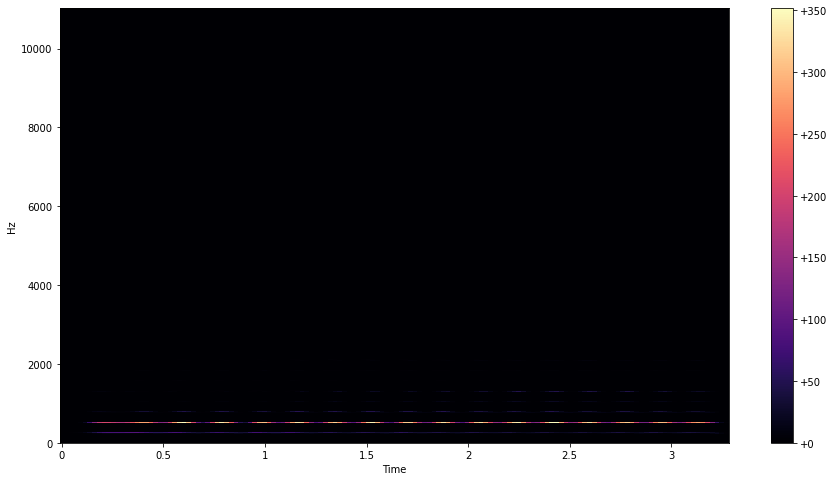

In [129]:
plot_spectrogram(Y_fluteC4, sr1, HOP_SIZE)

##### Log-Amplitude Spectrogram

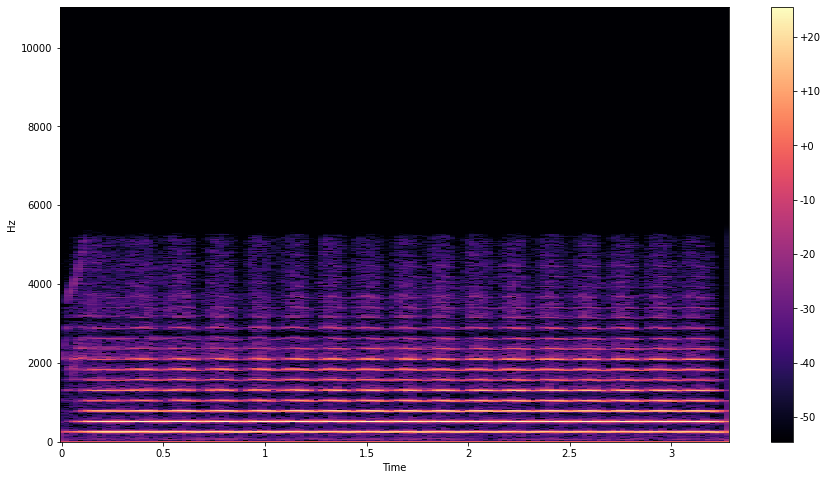

In [130]:
Y_log_fluteC4 = librosa.power_to_db(Y_fluteC4)
plot_spectrogram(Y_log_fluteC4, sr1, HOP_SIZE)

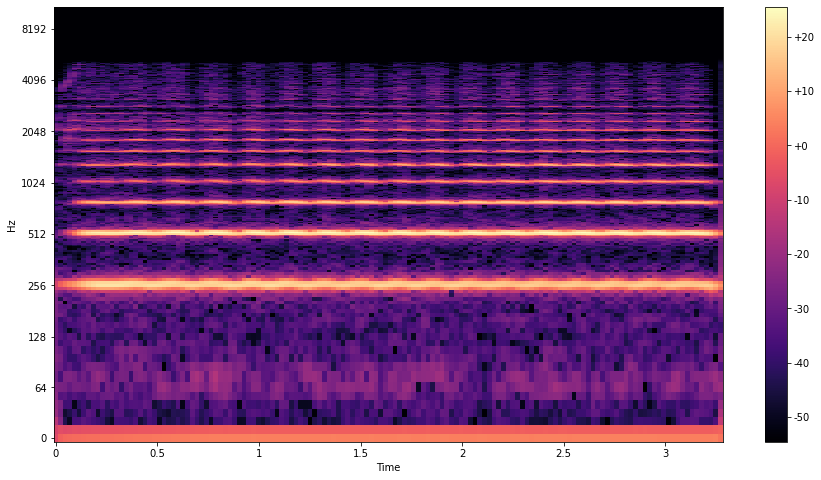

In [131]:
plot_spectrogram(Y_log_fluteC4, sr1, HOP_SIZE, y_axis='log')

##### Melt filter banks

In [132]:
sr1

22050

In [133]:
filter_banks = librosa.filters.mel(n_fft=FRAME_SIZE, sr=22050,n_mels=10)

In [134]:
filter_banks.shape

(10, 1025)

In [135]:
# n_mels, 2048/2+1 = 1025, FRAME_SIZE=2048, F_S/2=Nyqist f 

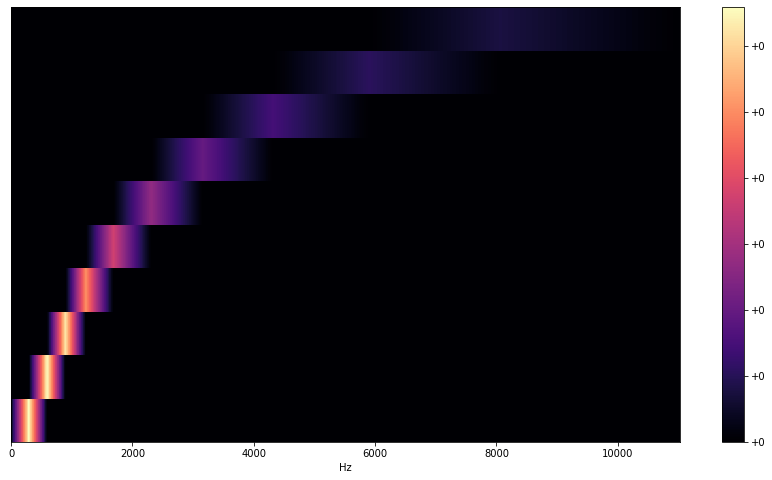

In [136]:
plt.figure(figsize=(15,8))
librosa.display.specshow(filter_banks,
                         sr=sr1,
                         x_axis='linear')
plt.colorbar(format="%+2.f")

##### Extracting Mel Spectrogram

In [36]:
mel_spectrogram = librosa.feature.melspectrogram(y=fluteC4, sr=sr1, n_fft=2048, hop_length=512, n_mels=90)

In [37]:
fluteC4.shape

(72500,)

In [38]:
mel_spectrogram.shape

(90, 142)

In [27]:
# n_mels x, 142 appears before, seems to be right

In [28]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [29]:
log_mel_spectrogram.shape

(90, 142)

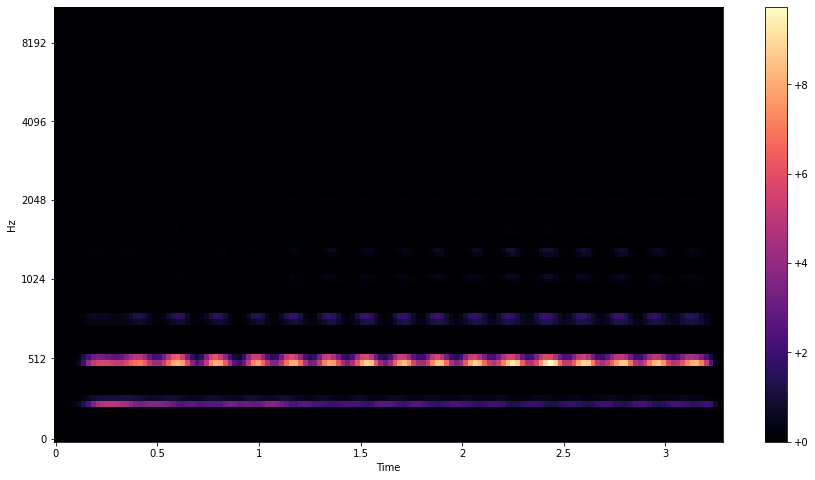

In [30]:
plt.figure(figsize=(15,8))
librosa.display.specshow(mel_spectrogram,
                         x_axis='time',
                         y_axis='mel')
plt.colorbar(format="%+2.f")

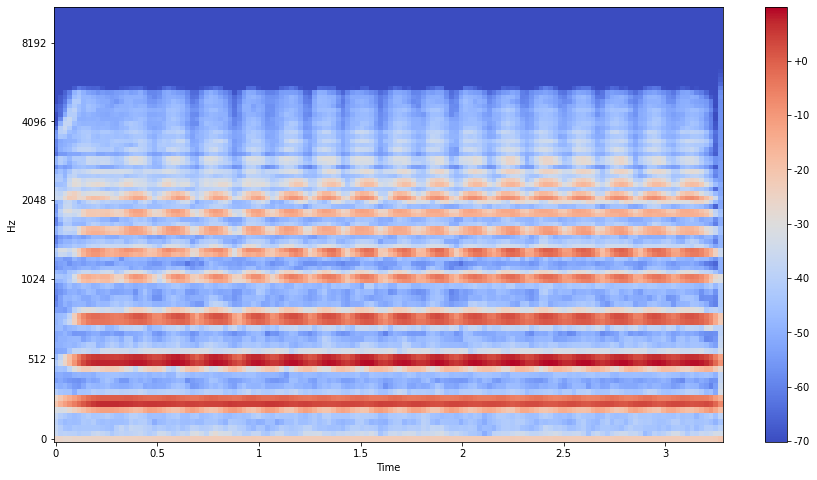

In [142]:
plt.figure(figsize=(15,8))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis='time',
                         y_axis='mel')
plt.colorbar(format="%+2.f")